<a href="https://colab.research.google.com/github/Likhithagandham/Student-Training-Program/blob/main/PCA_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving santhosh-removebg-preview.png to santhosh-removebg-preview.png
Enter number of PCA components to keep (e.g., 50, 100, 200): 10
Original file size: 48.9482421875 KB
Compressed file size (10 comps): 55.630859375 KB


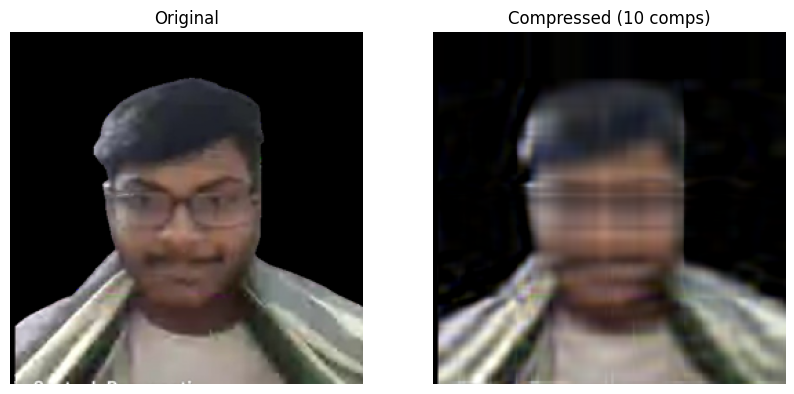

In [ ]:
from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

# Step 1: Upload ONE image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 2: Load and preprocess (color + resize higher res if needed)
img = Image.open(filename).convert("RGB")
img = img.resize((256, 256))  # manageable resolution
img_array = np.array(img) / 255.0  # normalize (0-1)

# Step 3: Choose number of PCA components
n_components = int(input("Enter number of PCA components to keep (e.g., 50, 100, 200): "))

# Step 4: Apply PCA separately on R, G, B channels
reconstructed_channels = []
for i in range(3):  # R, G, B
    channel = img_array[:, :, i]
    X = channel.reshape(channel.shape[0], -1)

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)

    reconstructed_channels.append(X_reconstructed)

# Step 5: Merge channels back into one image
reconstructed_img = np.stack(reconstructed_channels, axis=2)

# Step 6: Save original and compressed versions
original_path = "original.png"
compressed_path = f"compressed_{n_components}.png"

Image.fromarray((img_array * 255).astype(np.uint8)).save(original_path)
Image.fromarray((np.clip(reconstructed_img, 0, 1) * 255).astype(np.uint8)).save(compressed_path)

# Step 7: Show sizes to prove compression
print("Original file size:", os.path.getsize(original_path)/1024, "KB")
print(f"Compressed file size ({n_components} comps):", os.path.getsize(compressed_path)/1024, "KB")

# Step 8: Show Original vs Compressed
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.axis("off")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(np.clip(reconstructed_img, 0, 1))
plt.axis("off")
plt.title(f"Compressed ({n_components} comps)")

plt.show()
